In [1]:
import pandas as pd

In [2]:
#Cargar los datos
df = pd.read_csv('rum/gasolinePricesInRomania.csv')

In [3]:
df.head()

,date,gasoline price per liter in RON
0,23-09-2020,4.440
1,24-09-2020,4.440
2,25-09-2020,4.440
3,26-09-2020,4.438
4,27-09-2020,4.438


In [4]:
# Renombro la columna date a fecha
df = df.rename(columns={'date': 'fecha'})

In [5]:
# Renombro la columna gasoline price per liter in RON a precio
df = df.rename(columns={'gasoline price per liter in RON': 'precio'})


In [6]:
df.head()

,fecha,precio
0,23-09-2020,4.440
1,24-09-2020,4.440
2,25-09-2020,4.440
3,26-09-2020,4.438
4,27-09-2020,4.438


In [7]:
# Convertir la columna fecha al formato datetime, especificando el formato de entrada
df['fecha'] = pd.to_datetime(df['fecha'], format='%d-%m-%Y')

In [8]:
# Establecer la fecha como índice
df.set_index('fecha', inplace=True)

In [9]:
df.head()

,precio
fecha,
2020-09-23,4.440
2020-09-24,4.440
2020-09-25,4.440
2020-09-26,4.438
2020-09-27,4.438


In [10]:
# Primera fecha del indice
df.index.min()

Timestamp('2020-09-23 00:00:00')

In [11]:
# Extraigo la ultima fecha del indice
df.index.max()

Timestamp('2023-03-12 00:00:00')

In [12]:
# Cálculo de promedios mensuales
df.resample(rule='ME').mean()

,precio
fecha,
2020-09-30,4.450125
2020-10-31,4.536452
2020-11-30,4.509067
2020-12-31,4.690667
2021-01-31,4.917419
2021-02-28,5.164607
2021-03-31,5.440667
2021-04-30,5.512815
2021-05-31,5.576677


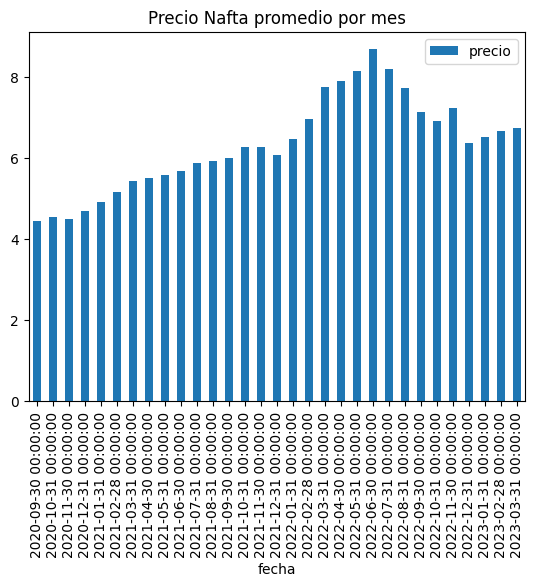

In [13]:
# Graficar
df.resample('ME').mean().plot.bar(title='Precio Nafta promedio por mes');

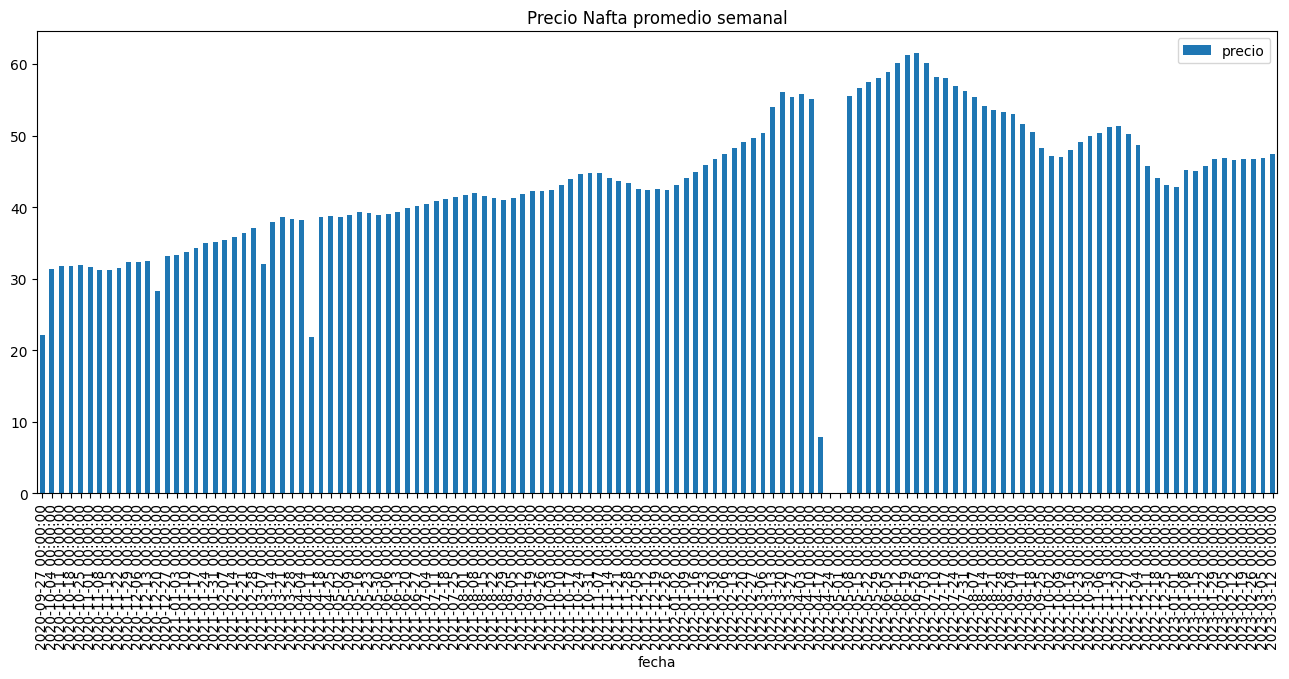

In [14]:
title = 'Precio Nafta promedio semanal'
df.resample('W').sum().plot.bar(figsize=(16,6), title=title,color='#1f77b4');

Grfico QQPlot

In [15]:
import scipy.stats
import pylab
import matplotlib.pyplot as plt 

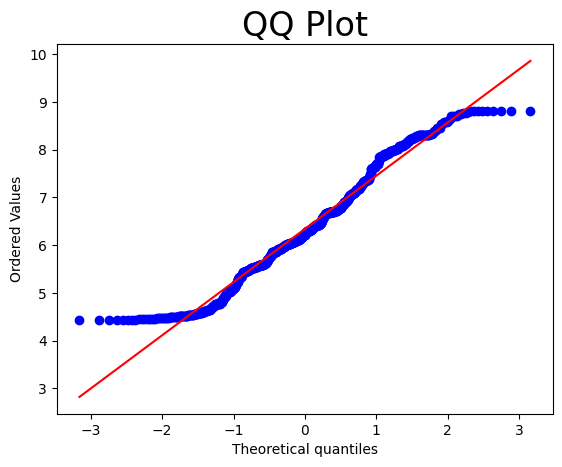

In [16]:
scipy.stats.probplot(df.precio, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

<Axes: xlabel='fecha'>

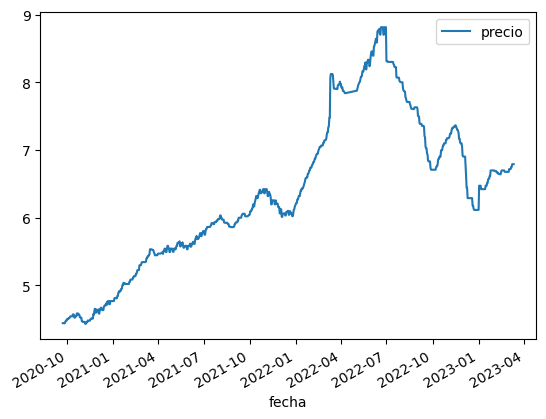

In [17]:
df.plot()

In [18]:
import statsmodels.tsa.stattools as sts 

sts.adfuller(df['precio'])

(-1.6785517200432036,
 0.44219577236883795,
 14,
 861,
 {'1%': -3.4379677736185514,
  '5%': -2.8649026847264074,
  '10%': -2.568560548763626},
 -2991.1018089124955)

Tratare de hacerla estacionaria.

In [19]:
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 

In [20]:
def check_stationarity(series, name=""):
    result = sts.adfuller(series.dropna())
    print(f'Prueba ADF para {name}:')
    print(f'Estadístico: {result[0]:.4f}')
    print(f'p-valor: {result[1]:.4f}')
    print(f'Valores críticos:')
    for key, value in result[4].items():
        print(f'   {key}: {value:.4f}')
    
    # Interpretar resultado
    if result[1] <= 0.05:
        print(f"Conclusión: La serie {name} es estacionaria (p-valor <= 0.05)")
    else:
        print(f"Conclusión: La serie {name} no es estacionaria (p-valor > 0.05)")
    print("-" * 50)
    return result[1] <= 0.05

In [21]:
# Función para graficar series
def plot_series(original, transformed, title="Comparación de Series"):
    plt.figure(figsize=(12, 6))
    plt.subplot(211)
    plt.plot(original)
    plt.title("Serie Original")
    plt.subplot(212)
    plt.plot(transformed, color='red')
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [22]:
# Verificar la serie original
print("ANÁLISIS DE LA SERIE ORIGINAL")
is_stationary = check_stationarity(df['precio'], "original")

ANÁLISIS DE LA SERIE ORIGINAL
Prueba ADF para original:
Estadístico: -1.6786
p-valor: 0.4422
Valores críticos:
   1%: -3.4380
   5%: -2.8649
   10%: -2.5686
Conclusión: La serie original no es estacionaria (p-valor > 0.05)
--------------------------------------------------



1. MÉTODO DE DIFERENCIACIÓN
Prueba ADF para primera diferencia:
Estadístico: -5.4303
p-valor: 0.0000
Valores críticos:
   1%: -3.4380
   5%: -2.8649
   10%: -2.5686
Conclusión: La serie primera diferencia es estacionaria (p-valor <= 0.05)
--------------------------------------------------


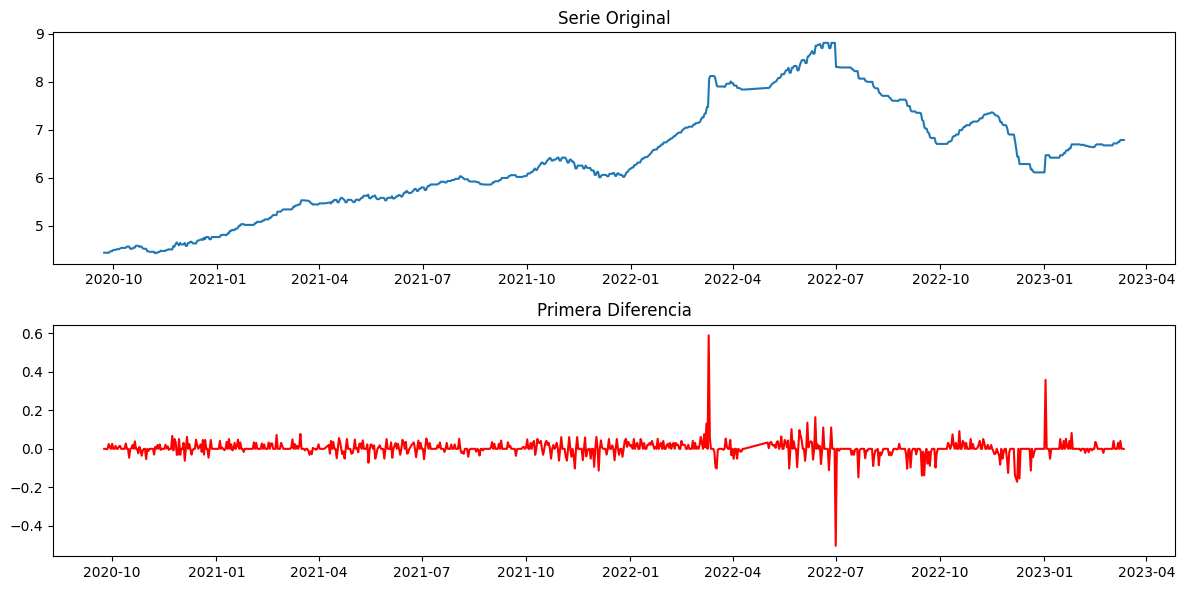

In [23]:
# 1. DIFERENCIACIÓN
print("\n1. MÉTODO DE DIFERENCIACIÓN")
# Primera diferencia
diff1 = df['precio'].diff().dropna()
is_stationary_diff1 = check_stationarity(diff1, "primera diferencia")
plot_series(df['precio'], diff1, "Primera Diferencia")

PACF

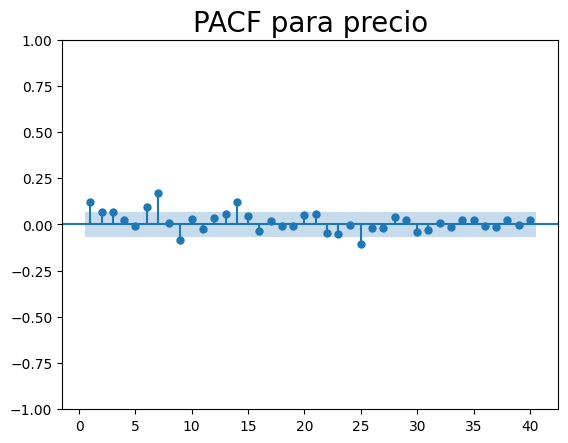

In [24]:
sgt.plot_pacf(diff1, zero = False, lags = 40)
plt.title("PACF para precio", size = 20)
plt.show()

Basado en el gráfico PACF, podemos hacer las siguientes observaciones:

1. La función de autocorrelación parcial (PACF) muestra valores cercanos a cero para la mayoría de los rezagos, lo que es una buena señal de que se ha logrado convertir la serie en estacionaria.

2. Se observa que casi todos los valores están dentro de las bandas de confianza (zona sombreada azul), lo que indica que no hay autocorrelaciones parciales significativas.

3. Hay algunos picos que sobresalen ligeramente (como en los rezagos 1, 6 y 7), pero son relativamente pequeños y podrían ser producto del azar.

Para un modelo AR, debemos fijarnos en los cortes significativos en la PACF. En este caso, no se observa un patrón claro de cortes significativos, lo que sugiere que:

- Se podría considerar un modelo AR(0), que es básicamente ruido blanco.
- Alternativamente, podríamos probar un modelo AR(1) muy simple debido al ligero pico en el primer rezago.

El PACF indica que la serie está bastante bien comportada y parece que la transformación aplicada para hacerla estacionaria ha sido efectiva. Para confirmar el mejor modelo, se debería hacer:

1. Ajustar varios modelos (AR(0), AR(1), y quizás ARMA con diferentes órdenes)
2. Comparar sus criterios de información (AIC, BIC)
3. Verificar los residuos para asegurarte de que no queda autocorrelación

¿Qué método utilizaste para transformar tu serie original en estacionaria?

Modelo AR(0) Ruido blanco

In [25]:
# Si son datos mensuales
diff1 = diff1.asfreq('MS')

In [26]:
nafta_modelo_ar_0 = ARIMA(diff1, order=(0,0,0))

In [28]:
nafta_resultados_ar_0 = nafta_modelo_ar_0.fit()

In [29]:
nafta_resultados_ar_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 precio   No. Observations:                   30
Model:                          ARIMA   Log Likelihood                  27.282
Date:                Sat, 19 Apr 2025   AIC                            -50.564
Time:                        19:42:42   BIC                            -47.762
Sample:                    10-01-2020   HQIC                           -49.668
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0121      0.083     -0.145      0.884      -0.175       0.151
sigma2         0.0089      0.003      2.787      0.005       0.003       0.015
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):               783.88
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):              64.03   Skew:                            -4.89
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Modelo AR(1)

In [30]:
nafta_modelo_ar_1 = ARIMA(diff1, order=(1,0,0))

In [31]:
nafta_resultados_ar_1 = nafta_modelo_ar_1.fit()

In [32]:
nafta_resultados_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 precio   No. Observations:                   30
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  27.439
Date:                Sat, 19 Apr 2025   AIC                            -48.878
Time:                        19:44:29   BIC                            -44.674
Sample:                    10-01-2020   HQIC                           -47.533
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0125      0.073     -0.172      0.864      -0.155       0.130
ar.L1         -0.1015      0.524     -0.194      0.846      -1.128       0.925
sigma2         0.0088      0.004      2.435      0.015       0.002       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               743.65
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              57.02   Skew:                            -4.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""